Ebben a fájlban, összehasonlítsuk, hogy egy klaszterező algoritmus mind kezdene ugyanazzal a képszegmentálási feladattal

Kipróbáltam több algoritmust, azonban a kép mérete és komplexitása miatt csak a Kmeans bizonyult működőképesnek, ezért ezzel lesz elvégezve az alábbi feladat

In [ ]:
import os

input_dir = "./oxford-iiit-pet/images/"
target_dir = "./oxford-iiit-pet/annotations/trimaps/"
img_size = (160, 160)
num_classes = 3
batch_size = 32

input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

Number of samples: 7390
./oxford-iiit-pet/images/Abyssinian_1.jpg | ./oxford-iiit-pet/annotations/trimaps/Abyssinian_1.png
./oxford-iiit-pet/images/Abyssinian_10.jpg | ./oxford-iiit-pet/annotations/trimaps/Abyssinian_10.png
./oxford-iiit-pet/images/Abyssinian_100.jpg | ./oxford-iiit-pet/annotations/trimaps/Abyssinian_100.png
./oxford-iiit-pet/images/Abyssinian_101.jpg | ./oxford-iiit-pet/annotations/trimaps/Abyssinian_101.png
./oxford-iiit-pet/images/Abyssinian_102.jpg | ./oxford-iiit-pet/annotations/trimaps/Abyssinian_102.png
./oxford-iiit-pet/images/Abyssinian_103.jpg | ./oxford-iiit-pet/annotations/trimaps/Abyssinian_103.png
./oxford-iiit-pet/images/Abyssinian_104.jpg | ./oxford-iiit-pet/annotations/trimaps/Abyssinian_104.png
./oxford-iiit-pet/images/Abyssinian_105.jpg | ./oxford-iiit-pet/annotations/trimaps/Abyssinian_105.png
./oxford-iiit-pet/images/Abyssinian_106.jpg | ./oxford-iiit-pet/annotations/trimaps/Abyssinian_106.png
./oxford-iiit-pet/images/Abyssinian_107.jpg | ./oxford-

Beolvasunk egy random képet

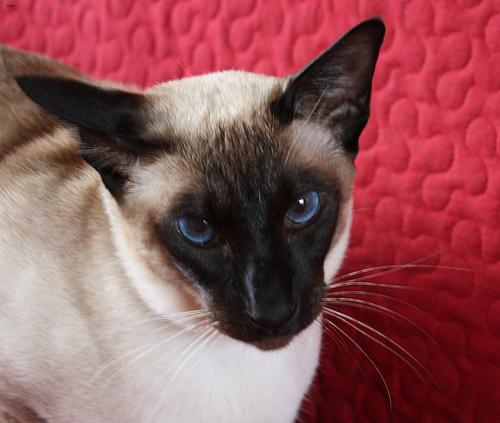

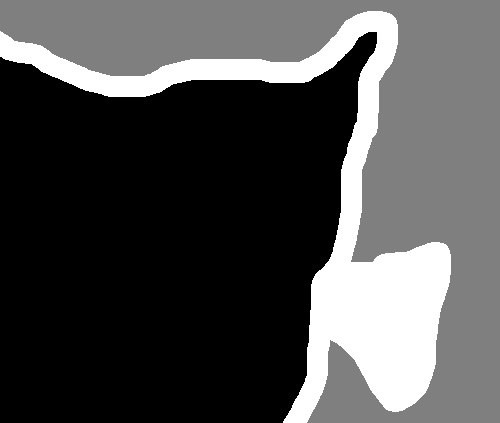

In [55]:
from IPython.display import Image, display
import tensorflow as tf
from keras.utils import load_img
from PIL import ImageOps

# Display input image #7
display(Image(filename=input_img_paths[2025]))

img = load_img(target_img_paths[2025])

display(ImageOps.autocontrast(load_img(target_img_paths[2025])))

Átalakítjuk a képünket mátrix reprezentációvá

In [56]:
import numpy as np

data = np.asarray(img)
data

array([[[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]]], shape=(423, 500, 3), dtype=uint8)

In [57]:
data.shape

(423, 500, 3)

In [58]:
data = data.reshape((-1,3))

In [59]:
data.shape

(211500, 3)

Mivel a target 3 színt tartalmaz, ezért 3 klaszterbe osztályozunk KMeans módszerrel

In [60]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(data);

In [61]:
import seaborn
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

def plot_result_3d(kmeans):
    fig = plt.figure(figsize=(5, 5))
    ax = Axes3D(fig)
    ax.scatter3D(data[:,0],data[:,1],data[:,2],c=kmeans.labels_, marker='+')
    ax.set_title(str(kmeans.n_clusters) + ' Cluster(s)')
plot_result_3d(kmeans)

<Figure size 500x500 with 0 Axes>

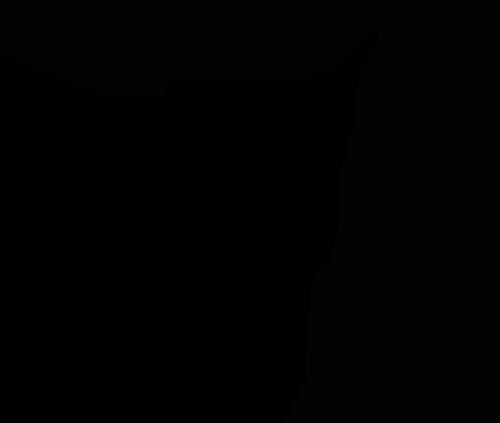

In [62]:
from PIL import Image

newimg = kmeans.cluster_centers_[kmeans.labels_]
newimg = newimg.reshape((423,500,3)).astype('uint8')
Image.fromarray(newimg)

A képből nagyon halványan kivehető, hogy a macska alakját majdnem tökéletesen elkapta, azonban ez a jól elkülönülő háttértől lehet. Sima klaszterezéssel nagyon nehezen vagy lehetetlen megoldani megfelelően egy szegmentációs feladatot általános esetben.